In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import importlib

sys.path.append(os.path.abspath(".."))
import misc
importlib.reload(misc)
from misc import load_csv_dataset

In [5]:
df = pd.DataFrame(load_csv_dataset("names_featured.csv"))

>> Loading CSV dataset from names_featured.csv
>> Detected fieldnames: ['name', 'sex', 'region', 'year', 'words', 'length', 'probable_native', 'probable_surname', 'identified_category', 'identified_name', 'identified_surname', 'annotated', 'province']
>> Successfully loaded with UTF-8 encoding


## Breakdown by major province

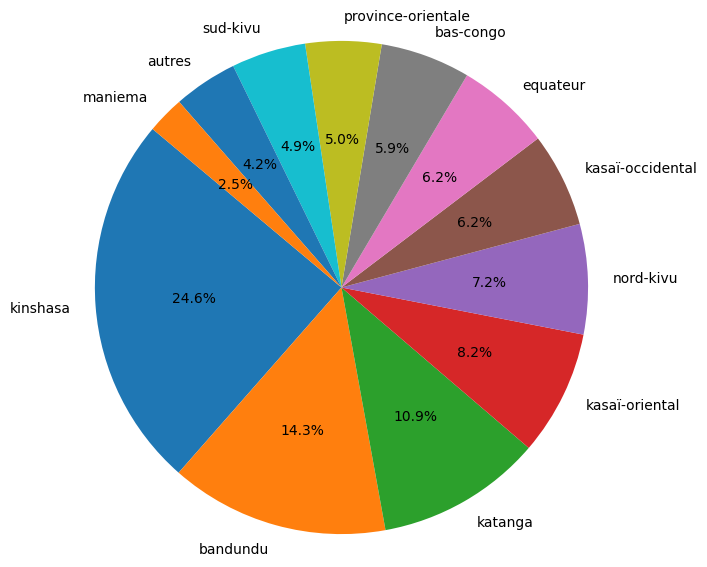

In [6]:
provinces = df['province'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(provinces, labels=provinces.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

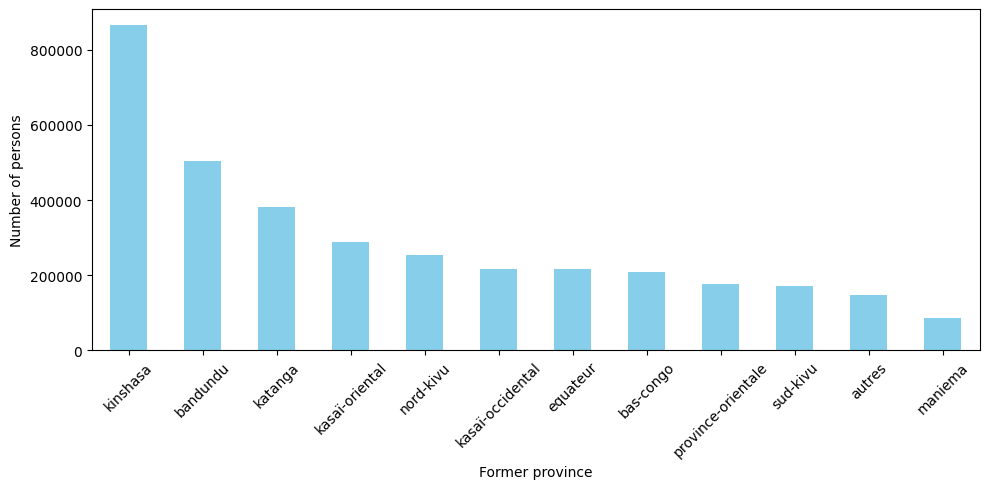

In [ ]:
plt.figure(figsize=(10, 5))
provinces.plot(kind='bar', color='skyblue')
plt.xlabel("Province")
plt.ylabel("Persons")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#breakdown of names into surname, middle name and first name
#constraint: take into account compound names (eg. ILUNGA WA ILUNGA MARC)
#            take into account missing names (eg. LOKUA KANZA, KASONGO GERMAINE)

df['split'] = df['name'].str.strip().str.split()
df = df[df['split'].notna() & df['split'].str.len() > 0]
df['surname'] = df['split'].apply(lambda x: x[0] if len(x) >= 1 else "null")
df['first_name'] = df['split'].apply(lambda x: x[-1] if len(x) >= 2 else "null")
df['middle_name'] = df['split'].apply(lambda x: ' '.join(x[1:-1]) if len(x) > 2 else "null")
df.drop(columns=['split'], inplace=True)
df[['name', 'surname', 'middle_name', 'first_name']].head()

,name,surname,middle_name,first_name
0,epenge djongesongo jonas,epenge,djongesongo,jonas
1,eyongoyongo shako michel,eyongoyongo,shako,michel
2,okawonga ongondjo alphonse,okawonga,ongondjo,alphonse
3,ombala lokolo nathals,ombala,lokolo,nathals
4,shongo matete albert,shongo,matete,albert


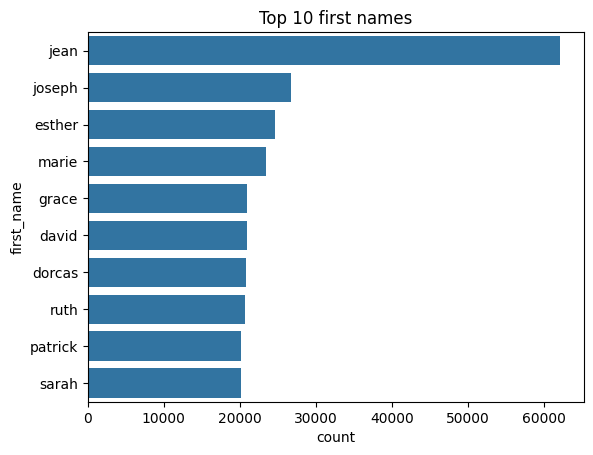

In [ ]:
# Simple distribution of first names (display of the 10 most popular first names)
sns.countplot(y=df['first_name'], order=df['first_name'].value_counts().iloc[:10].index)
plt.title("Top 10 first names")
plt.show()

In [ ]:
firstnames = df['first_name'].value_counts()
df_firstnames = firstnames.reset_index()
df_firstnames.columns = ['FIrst name', 'quantity']
df_firstnames.head(10)

,FIrst name,quantity
0,jean,62175
1,joseph,26696
2,esther,24647
3,marie,23449
4,grace,21000
5,david,20926
6,dorcas,20847
7,ruth,20645
8,patrick,20213
9,sarah,20195


In [ ]:
# Total number of distinct first names
total_firstnames = df['first_name'].notna().sum()
print(f">> Total number of first names registered : {total_firstnames}")

# categorization of first names
firstnames_by_sex = df.groupby(['first_name', 'sex']).size().unstack(fill_value=0)
male_firstnames = firstnames_by_sex[(firstnames_by_sex['M'] > 0) & (firstnames_by_sex['F'] == 0)]
print(f">> Number of all-male first names : {len(male_firstnames)}")
female_firstnames = firstnames_by_sex[(firstnames_by_sex['F'] > 0) & (firstnames_by_sex['M'] == 0)]
print(f">> Number of all-female first names : {len(female_firstnames)}")
neutral_firstnames = firstnames_by_sex[(firstnames_by_sex['M'] > 0) & (firstnames_by_sex['F'] > 0)]
print(f">> Number of all-neutral first names : {len(neutral_firstnames)}")


>> Total number of first names registered : 3406845
>> Number of all-male first names : 111226
>> Number of all-female first names : 61389
>> Number of all-neutral first names : 26694


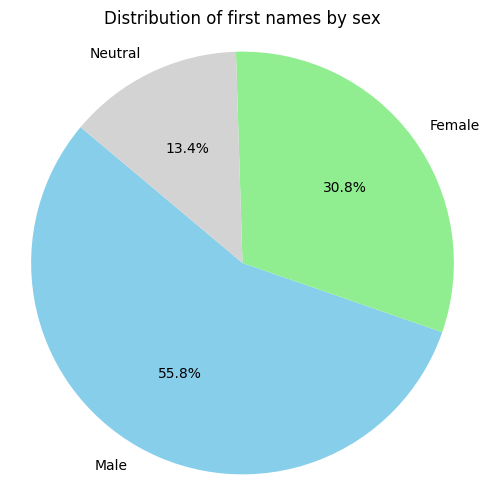

In [ ]:
# data for graphic interpretation 
labels = ['Male', 'Female', 'Neutral']
values = [len(male_firstnames), len(female_firstnames), len(neutral_firstnames)]

# circular
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightgray'])
plt.title("Distribution of first names by sex")
plt.axis('equal')
plt.show()

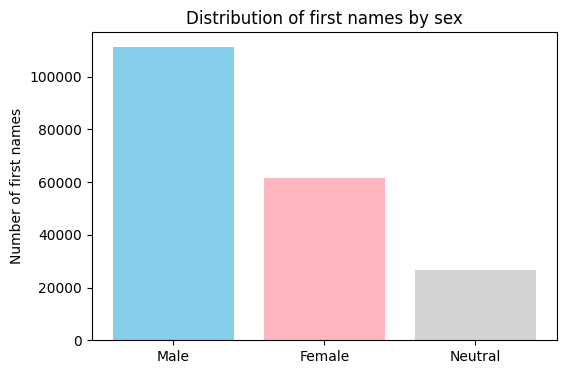

In [ ]:
# Histogram
plt.figure(figsize=(6,4))
plt.bar(labels, values, color=['skyblue', 'lightpink', 'lightgray'])
plt.title("Distribution of first names by sex")
plt.ylabel("Number of first names")
plt.show()

In [ ]:
# Count of unique first names per region (province)
distinct_regions = df['legacy_province'].nunique()
print(f">> Number of distinct regions: {distinct_regions}")
firstnames_by_region = df.groupby('legacy_province')['first_name'].nunique().sort_values(ascending=False)

print("Number of unique first names per region")
df_firstnames_region = firstnames_by_region.reset_index()
df_firstnames_region.columns = ['Region', 'Unique first names']
df_firstnames_region.head(12)


>> Number of distinct regions: 12
Number of unique first names per region


,Region,Unique first names
0,KINSHASA,75661
1,BANDUNDU,43387
2,KATANGA,38156
3,AUTRES,31683
4,NORD-KIVU,27356
5,EQUATEUR,25480
6,BAS-CONGO,24206
7,SUD-KIVU,23928
8,PROVINCE-ORIENTALE,18436
9,KASAÏ-ORIENTAL,15961


In [ ]:
# top 3 most popular first names by region
grouped = df.groupby(['legacy_province', 'first_name']).size().reset_index(name='count')
grouped = grouped.sort_values(['legacy_province', 'count'], ascending=[True, False])
top3_by_region = grouped.groupby('legacy_province').head(3)

for province, group in top3_by_region.groupby('legacy_province'):
    print(f"{province.upper()}")
    for _, row in group.iterrows():
        print(f"    {row['first_name']:<15} {row['count']}")
    print()


AUTRES
    jean            3633
    patrick         2204
    tresor          1967

BANDUNDU
    jean            4948
    joel            1583
    dieu            1219

BAS-CONGO
    jean            3381
    joseph          2093
    marie           1806

EQUATEUR
    jean            8195
    joseph          3095
    marie           2322

KASAÏ-OCCIDENTAL
    jean            10392
    andre           4787
    marie           3591

KASAÏ-ORIENTAL
    jean            14209
    joseph          5194
    marie           4774

KATANGA
    jean            5307
    ruth            3190
    esther          3019

KINSHASA
    ruth            9829
    dorcas          9802
    sarah           9699

MANIEMA
    jean            1200
    joseph          649
    marie           530

NORD-KIVU
    justin          3301
    grace           2996
    moise           2790

PROVINCE-ORIENTALE
    jean            4450
    joseph          2755
    moise           2566

SUD-KIVU
    justin          2245
    chris

In [ ]:
#Group by region, gender and first name, then count
def determine_sex_category(row):
    if row['first_name'] in neutral_firstnames:
        return 'Neutral'
    return row['sex']

df['sex_category'] = df.apply(determine_sex_category, axis=1)

# Groupement
grouped = df.groupby(['legacy_province', 'sex_category', 'first_name']).size().reset_index(name='count')
grouped = grouped.sort_values(['legacy_province', 'sex_category', 'count'], ascending=[True, True, False])
top3_by_region_sex = grouped.groupby(['legacy_province', 'sex_category']).head(3)

for (province, sex), group in top3_by_region_sex.groupby(['legacy_province', 'sex_category']):
    print(f"{province.upper()} - {sex}")
    for _, row in group.iterrows():
        print(f"    {row['first_name']:<15} {row['count']}")
    print()


AUTRES - F
    gracia          1259
    marie           1034
    sarah           893

AUTRES - M
    jean            3623
    patrick         2191
    tresor          1950

BANDUNDU - F
    marie           1127
    ruth            1059
    esther          1053

BANDUNDU - M
    jean            4919
    joel            1539
    dieu            1199

BAS-CONGO - F
    marie           1790
    dorcas          1378
    esther          1166

BAS-CONGO - M
    jean            3370
    joseph          2085
    andre           1170

EQUATEUR - F
    marie           2278
    esther          1807
    ruth            1371

EQUATEUR - M
    jean            8162
    joseph          3083
    jeremie         2243

KASAÏ-OCCIDENTAL - F
    marie           3518
    therese         1594
    esther          1456

KASAÏ-OCCIDENTAL - M
    jean            10376
    andre           4782
    francois        3332

KASAÏ-ORIENTAL - F
    marie           4713
    therese         2506
    rachel          1599

K

In [ ]:
# Grouping surnames by sex
surnames_by_sex = df.groupby(['surname', 'sex']).size().reset_index(name='count')
surnames_by_sex = surnames_by_sex.sort_values(['sex', 'count'], ascending=[True, False])
top10_per_sex = surnames_by_sex.groupby('sex').head(10)

for sex, group in top10_per_sex.groupby('sex'):
    print(f"Top 10 surnames for sex: {sex}")
    for _, row in group.iterrows():
        print(f"    {row['surname']:<15} {row['count']}")
    print()



Top 10 surnames for sex: F
    KAVIRA          23005
    KAVUGHO         13653
    KAHINDO         13585
    NTUMBA          11523
    ILUNGA          10886
    MBUYI           10589
    NGALULA         10534
    MASIKA          10332
    MUJINGA         10100
    KAPINGA         9892

Top 10 surnames for sex: M
    ILUNGA          30812
    KAMBALE         23357
    NGOY            21073
    KASONGO         20690
    KASEREKA        16116
    MUHINDO         14460
    KAZADI          12195
    MUTOMBO         11589
    KAKULE          11505
    MUMBERE         11196



In [ ]:
# Grouping surnames by region
surnames_by_region = df.groupby(['legacy_province', 'surname']).size().reset_index(name='count')
surnames_by_region = surnames_by_region.sort_values(['legacy_province', 'count'], ascending=[True, False])
top3_surnames_per_region = surnames_by_region.groupby('legacy_province').head(3)

for province, group in top3_surnames_per_region.groupby('legacy_province'):
    print(f"{province.upper()}")
    for _, row in group.iterrows():
        print(f"    {row['surname']:<15} {row['count']}")
    print()


AUTRES
    ilunga          7203
    ngoy            5876
    kasongo         4399

BANDUNDU
    mbo             3490
    mpia            2413
    mputu           1778

BAS-CONGO
    nzuzi           3843
    nlandu          3299
    matondo         2806

EQUATEUR
    mboyo           1681
    lokuli          907
    bolumbu         816

KASAÏ-OCCIDENTAL
    ntumba          5003
    mbuyi           4117
    ngalamulume     2815

KASAÏ-ORIENTAL
    ngoyi           7915
    ilunga          5231
    mbuyi           4727

KATANGA
    ilunga          16056
    ngoy            13447
    kasongo         9844

KINSHASA
    ntumba          4751
    nsimba          4475
    matondo         4389

MANIEMA
    amisi           966
    ramazani        844
    assani          598

NORD-KIVU
    kambale         17268
    kavira          17028
    kasereka        11985

PROVINCE-ORIENTALE
    bahati          1076
    baraka          874
    kambale         853

SUD-KIVU
    bahati          2363
    furaha 

In [ ]:
# Grouping surnames by region and sex
grouped = df.groupby(['legacy_province', 'sex', 'surname']).size().reset_index(name='count')
grouped = grouped.sort_values(['legacy_province', 'sex', 'count'], ascending=[True, True, False])
top3_surnames_by_region_sex = grouped.groupby(['legacy_province', 'sex']).head(3)

for (province, sex), group in top3_surnames_by_region_sex.groupby(['legacy_province', 'sex']):
    print(f"{province.upper()} - {sex}")
    for _, row in group.iterrows():
        print(f"    {row['surname']:<15} {row['count']}")
    print()

AUTRES - F
    ilunga          1760
    ngoy            992
    ngoie           963

AUTRES - M
    ilunga          5443
    ngoy            4884
    kasongo         3438

BANDUNDU - F
    mbo             1209
    mpia            876
    mputu           658

BANDUNDU - M
    mbo             2281
    mpia            1537
    mputu           1120

BAS-CONGO - F
    nzuzi           2054
    nlandu          1530
    tsimba          1464

BAS-CONGO - M
    nzuzi           1789
    nlandu          1769
    ngoma           1674

EQUATEUR - F
    mboyo           796
    bolumbu         633
    amba            466

EQUATEUR - M
    mboyo           885
    lokuli          720
    lokwa           461

KASAÏ-OCCIDENTAL - F
    ngalula         2629
    kapinga         1597
    ntumba          1537

KASAÏ-OCCIDENTAL - M
    ntumba          3466
    ngalamulume     2803
    mbuyi           2669

KASAÏ-ORIENTAL - F
    ntumba          2074
    mbuyi           2023
    ngoyi           1706

KASAÏ-ORIEN

In [ ]:
# Find surnames common to both sexes per region - the most popular per region

common_surnames = df.groupby(['legacy_province', 'surname', 'sex']).size().unstack(fill_value=0)
common_surnames = common_surnames[(common_surnames.get('M', 0) > 0) & (common_surnames.get('F', 0) > 0)]
common_surnames['total'] = common_surnames['M'] + common_surnames['F']
common_surnames = common_surnames.reset_index()
top_common_surnames = common_surnames.sort_values(['legacy_province', 'total'], ascending=[True, False])
top_common_surnames = top_common_surnames.groupby('legacy_province').first().reset_index()

for _, row in top_common_surnames.iterrows():
    print(f"{row['legacy_province'].upper()} → {row['surname']} ({row['M']} M / {row['F']} F) - Total: {row['total']}")

AUTRES → ilunga (5443 M / 1760 F) - Total: 7203
BANDUNDU → mbo (2281 M / 1209 F) - Total: 3490
BAS-CONGO → nzuzi (1789 M / 2054 F) - Total: 3843
EQUATEUR → mboyo (885 M / 796 F) - Total: 1681
KASAÏ-OCCIDENTAL → ntumba (3466 M / 1537 F) - Total: 5003
KASAÏ-ORIENTAL → ngoyi (6209 M / 1706 F) - Total: 7915
KATANGA → ilunga (10672 M / 5384 F) - Total: 16056
KINSHASA → ntumba (1500 M / 3251 F) - Total: 4751
MANIEMA → amisi (831 M / 135 F) - Total: 966
NORD-KIVU → kambale (17226 M / 42 F) - Total: 17268
PROVINCE-ORIENTALE → bahati (867 M / 209 F) - Total: 1076
SUD-KIVU → bahati (1766 M / 597 F) - Total: 2363


In [ ]:
# Grouping middle names by sex
middlenames_by_sex = df.groupby(['middle_name', 'sex']).size().reset_index(name='count')
middlenames_by_sex = middlenames_by_sex.sort_values(['sex', 'count'], ascending=[True, False])
top10_middlenames_per_sex = middlenames_by_sex.groupby('sex').head(10)

for sex, group in top10_middlenames_per_sex.groupby('sex'):
    print(f"Top 10 middle names for sex: {sex}")
    for _, row in group.iterrows():
        print(f"    {row['middle_name']:<15} {row['count']}")
    print()


Top 10 middle names for sex: F
    ILUNGA          11073
    KASONGO         8279
    KAZADI          6638
    NGOY            6436
    NTUMBA          6234
    MUTOMBO         5969
    KABEYA          4706
    MUKENDI         4655
    MATONDO         4530
    NGOYI           4443

Top 10 middle names for sex: M
    ILUNGA          18933
    KASONGO         14274
    NGOY            13313
    MUTOMBO         11146
    KAZADI          11076
    NTUMBA          9278
    NGOYI           9194
    KABEYA          8029
    MUKENDI         7967
    KALALA          7769



In [ ]:
# Grouping middle names by region
middlenames_by_region = df.groupby(['legacy_province', 'middle_name']).size().reset_index(name='count')
middlenames_by_region = middlenames_by_region.sort_values(['legacy_province', 'count'], ascending=[True, False])
top3_middlenames_per_region = middlenames_by_region.groupby('legacy_province').head(3)

for province, group in top3_middlenames_per_region.groupby('legacy_province'):
    print(f"{province.upper()}")
    for _, row in group.iterrows():
        print(f"    {row['middle_name']:<20} {row['count']}")
    print()    

AUTRES
    ngoy                 3646
    ilunga               3591
    kasongo              2761

BANDUNDU
    moke                 3243
    mbo                  1634
    mpia                 1444

BAS-CONGO
    ngoma                3570
    nlandu               2066
    khonde               1787

EQUATEUR
    mboyo                1226
    lokuli               1071
    nkoy                 724

KASAÏ-OCCIDENTAL
    ntumba               4552
    muamba               2830
    ngalamulume          2329

KASAÏ-ORIENTAL
    ngoyi                8302
    ilunga               6402
    kazadi               5260

KATANGA
    ilunga               8185
    ngoy                 8108
    kasongo              6136

KINSHASA
    matondo              3989
    ntumba               3289
    ilunga               3232

MANIEMA
    ramazani             835
    amisi                625
    shabani              525

NORD-KIVU
    tsongo               1678
    bahati               1212
    mahamba            

In [ ]:
# Grouping middle names by legacy_province and sex
middlenames_by_legacy_province_sex = df.groupby(['legacy_province', 'sex', 'middle_name']).size().reset_index(name='count')
middlenames_by_legacy_province_sex = middlenames_by_legacy_province_sex.sort_values(['legacy_province', 'sex', 'count'], ascending=[True, True, False])
top3_middlenames_by_legacy_province_sex = middlenames_by_legacy_province_sex.groupby(['legacy_province', 'sex']).head(3)

for (province, sex), group in top3_middlenames_by_legacy_province_sex.groupby(['legacy_province', 'sex']):
    print(f"{province.upper()} - {sex}")
    for _, row in group.iterrows():
        print(f"    {row['middle_name']:<20} {row['count']}")
    print()

AUTRES - F
    ilunga               1196
    kasongo              917
    ngoy                 824

AUTRES - M
    ngoy                 2822
    ilunga               2395
    kasongo              1844

BANDUNDU - F
    mbo                  669
    mpia                 590
    modiri               580

BANDUNDU - M
    moke                 2829
    mbo                  965
    n                    894

BAS-CONGO - F
    ngoma                1574
    nlandu               920
    khonde               797

BAS-CONGO - M
    ngoma                1996
    nlandu               1146
    muanda               999

EQUATEUR - F
    mboyo                462
    lokuli               362
    lokwa                219

EQUATEUR - M
    mboyo                764
    lokuli               709
    nkoy                 509

KASAÏ-OCCIDENTAL - F
    ntumba               1136
    muamba               679
    mulumba              597

KASAÏ-OCCIDENTAL - M
    ntumba               3416
    muamba               

In [ ]:
# Find middle names common to both sexes per region
common_middlenames = df.groupby(['legacy_province', 'middle_name', 'sex']).size().unstack(fill_value=0)
common_middlenames = common_middlenames[(common_middlenames.get('M', 0) > 0) & (common_middlenames.get('F', 0) > 0)]
common_middlenames['total'] = common_middlenames['M'] + common_middlenames['F']
common_middlenames = common_middlenames.reset_index()
common_middlenames = common_middlenames.sort_values(['legacy_province', 'total'], ascending=[True, False])
top3_common_middlenames = common_middlenames.groupby('legacy_province').head(3)

for province, group in top3_common_middlenames.groupby('legacy_province'):
    print(f"{province.upper()}")
    for _, row in group.iterrows():
        print(f"    {row['middle_name']:<20} {row['total']}")
    print()


AUTRES
    ngoy                 3646
    ilunga               3591
    kasongo              2761

BANDUNDU
    moke                 3243
    mbo                  1634
    mpia                 1444

BAS-CONGO
    ngoma                3570
    nlandu               2066
    khonde               1787

EQUATEUR
    mboyo                1226
    lokuli               1071
    nkoy                 724

KASAÏ-OCCIDENTAL
    ntumba               4552
    muamba               2830
    ngalamulume          2329

KASAÏ-ORIENTAL
    ngoyi                8302
    ilunga               6402
    kazadi               5260

KATANGA
    ilunga               8185
    ngoy                 8108
    kasongo              6136

KINSHASA
    matondo              3989
    ntumba               3289
    ilunga               3232

MANIEMA
    ramazani             835
    amisi                625
    shabani              525

NORD-KIVU
    tsongo               1678
    bahati               1212
    mahamba            

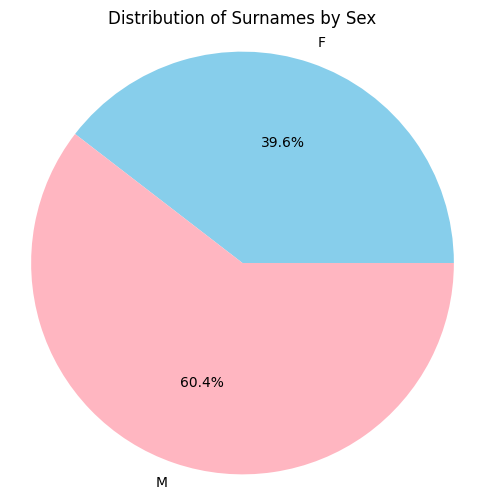

In [ ]:
# Pie chart of surnames by sex
surnames_sex_count = surnames_by_sex.groupby('sex')['count'].sum()
plt.figure(figsize=(6,6))
plt.pie(surnames_sex_count, labels=surnames_sex_count.index, autopct='%1.1f%%', colors=['skyblue', 'lightpink'])
plt.title("Distribution of Surnames by Sex")
plt.axis('equal')
plt.show()


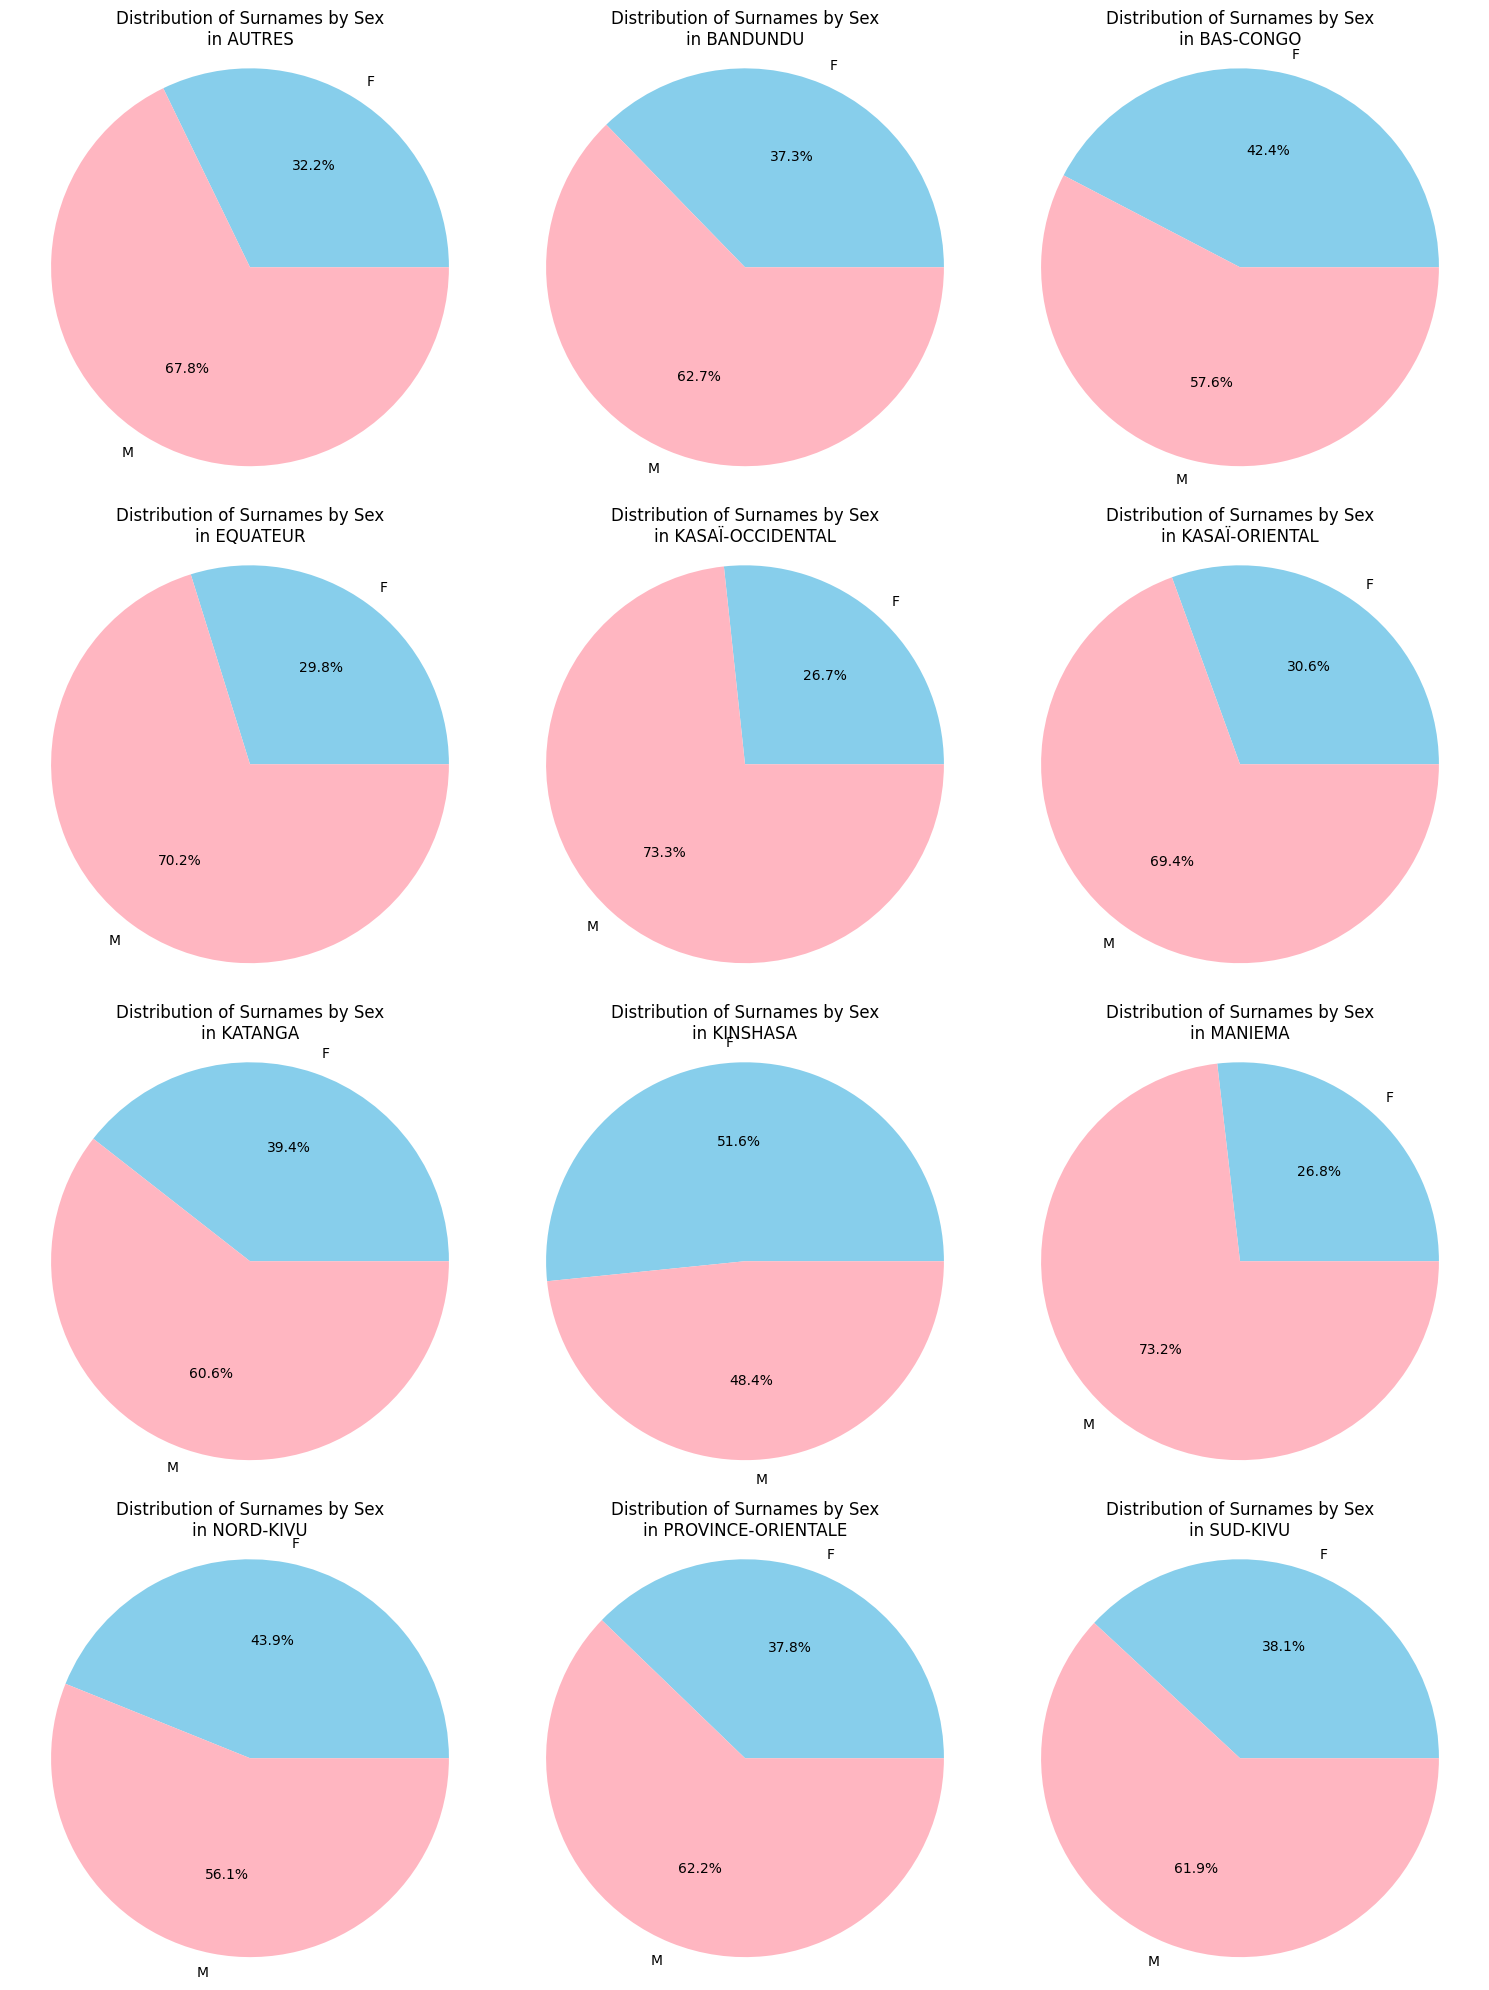

In [ ]:
# Pie chart of surnames bu sex and region
prov_sex_counts = df.groupby(['legacy_province', 'sex']).size().reset_index(name='count')
provinces = prov_sex_counts['legacy_province'].unique()
cols = 3
rows = (len(provinces) + cols - 1) // cols

plt.figure(figsize=(cols * 5, rows * 5))
for i, prov in enumerate(provinces, 1):
    data = prov_sex_counts[prov_sex_counts['legacy_province'] == prov]
    plt.subplot(rows, cols, i)
    plt.pie(data['count'], labels=data['sex'], autopct='%1.1f%%', colors=['skyblue', 'lightpink'])
    plt.title(f"Distribution of Surnames by Sex\nin {prov}")
    plt.axis('equal')

plt.tight_layout()
plt.show()

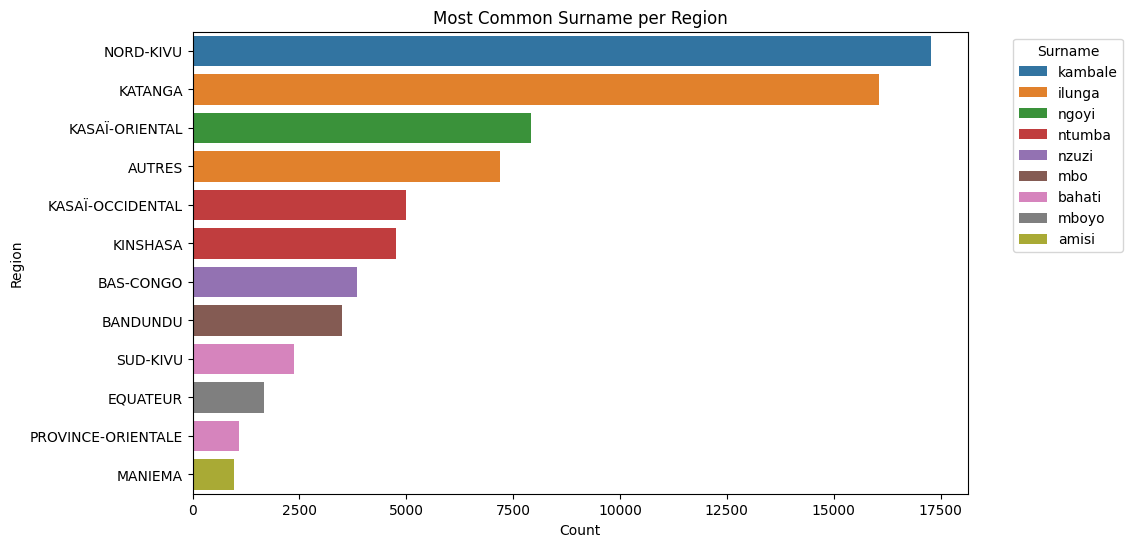

In [ ]:
# surnames per region (aggregated)
top_surnames_region = surnames_by_region.sort_values('count', ascending=False).drop_duplicates('legacy_province').head(12)
plt.figure(figsize=(10,6))
sns.barplot(y='legacy_province', x='count', data=top_surnames_region, hue='surname', dodge=False)
plt.title("Most Common Surname per Region")
plt.xlabel("Count")
plt.ylabel("Region")
plt.legend(title="Surname", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

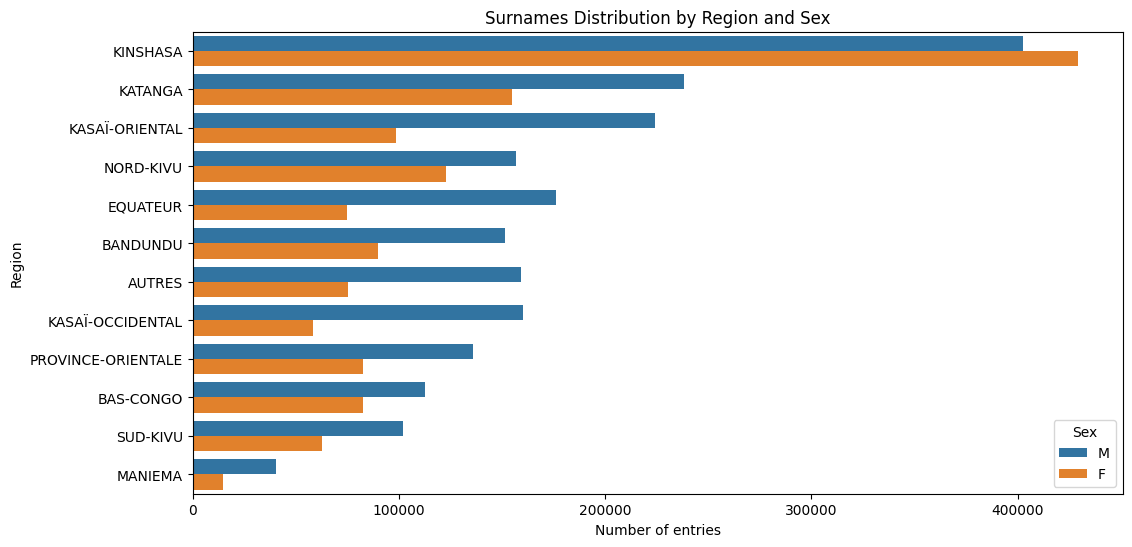

In [ ]:
# Bar chart surnames by region and sex
top10_regions = df['legacy_province'].value_counts().head(12).index.tolist()
df_top10 = df[df['legacy_province'].isin(top10_regions)]
plt.figure(figsize=(12,6))
sns.countplot(data=df_top10, y='legacy_province', hue='sex', order=top10_regions)
plt.title("Surnames Distribution by Region and Sex")
plt.xlabel("Number of entries")
plt.ylabel("Region")
plt.legend(title='Sex')
plt.show()

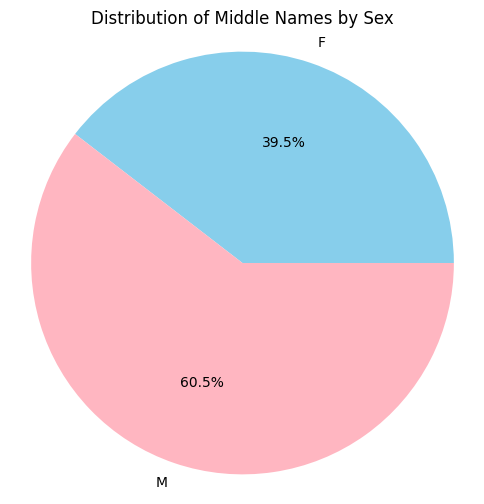

In [ ]:
# Pie chart of middle names by sex
middlenames_sex_count = middlenames_by_legacy_province_sex.groupby('sex')['count'].sum()
plt.figure(figsize=(6,6))
plt.pie(middlenames_sex_count, labels=middlenames_sex_count.index, autopct='%1.1f%%', colors=['skyblue', 'lightpink'])
plt.title("Distribution of Middle Names by Sex")
plt.axis('equal')
plt.show()

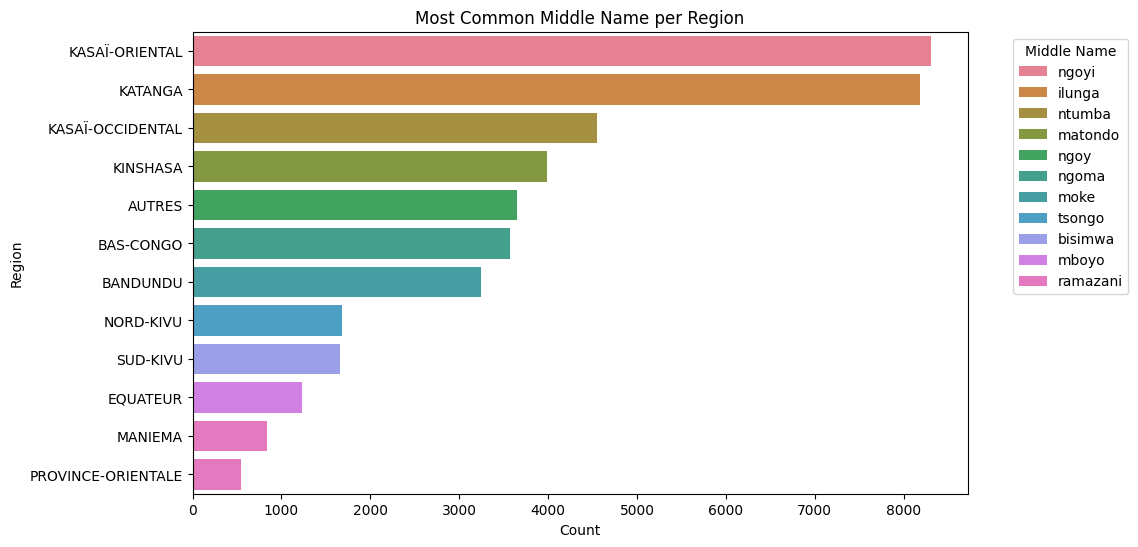

In [ ]:
# most popular middle name per region
top_middlename_region = middlenames_by_region.sort_values('count', ascending=False).drop_duplicates('legacy_province').head(12)
plt.figure(figsize=(10,6))
sns.barplot(y='legacy_province', x='count', data=top_middlename_region, hue='middle_name', dodge=False)
plt.title("Most Common Middle Name per Region")
plt.xlabel("Count")
plt.ylabel("Region")
plt.legend(title="Middle Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

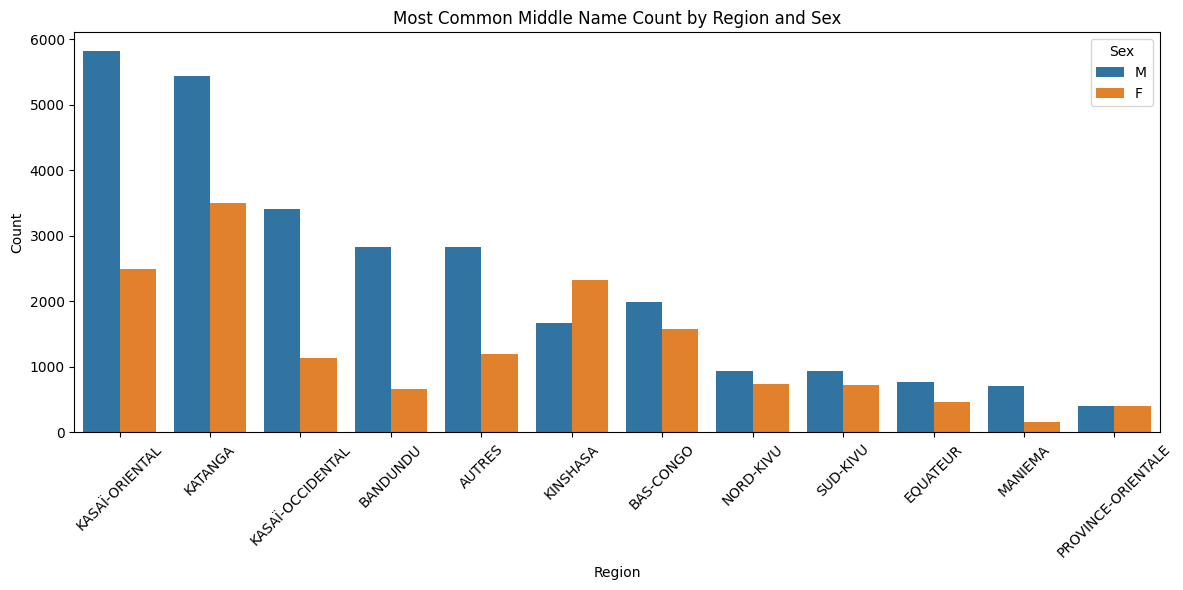

In [ ]:
#Bar chart middle name by region and sex
middlenames_by_sex_region = df.groupby(['legacy_province', 'sex', 'middle_name']).size().reset_index(name='count')
top_middlename_sex_region = middlenames_by_sex_region.sort_values('count', ascending=False).drop_duplicates(['legacy_province', 'sex'])

# Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_middlename_sex_region,
    x='legacy_province',
    y='count',
    hue='sex'
)
plt.title("Most Common Middle Name Count by Region and Sex")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Sex")
plt.tight_layout()
plt.show()